In [1]:
import numpy as np
import gate_operations as go
import qutip as qt
import random
from functools import reduce

from scipy.sparse import lil_array
from scipy.sparse import csr_matrix
import scipy.sparse

import matplotlib.pyplot as plt

# Visualized Single Qubit Transformations



True


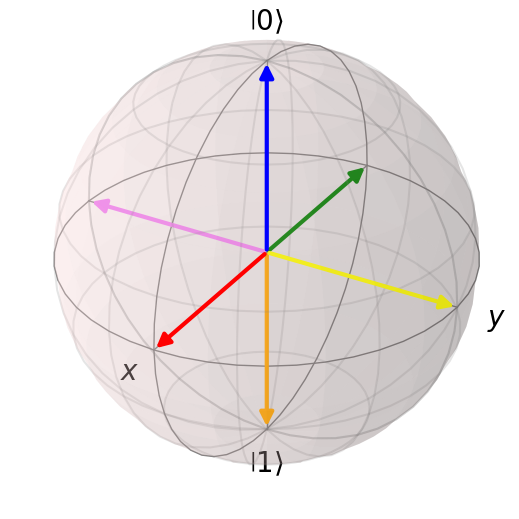

In [2]:
# INPUT SPACE
state = np.array([1,0])

print(state.shape == (2,))

assure_normalization = True




# create plot
bloch_sphere = qt.Bloch()

if assure_normalization:
    state = go.normalization_check(state)

# SEQUENCE
go.plot_bloch_state(state, bloch_sphere, "blue")

state = go.gate_operation(state, go.H())

go.plot_bloch_state(state, bloch_sphere, "red")

state = go.gate_operation(state, go.R_z(np.pi/2))
state = go.gate_operation(state, go.R_x(np.pi))

go.plot_bloch_state(state, bloch_sphere, "violet")

state = go.gate_operation(state, go.R_x(np.pi/2))
state = go.gate_operation(state, go.R_y(np.pi/2))

go.plot_bloch_state(state, bloch_sphere, "green")

state = go.gate_operation(state, go.R_z(-np.pi/2))

go.plot_bloch_state(state, bloch_sphere, "yellow")

state = go.gate_operation(state, go.R(np.array([1,0,0]),-np.pi/2))

go.plot_bloch_state(state, bloch_sphere, "orange")




bloch_sphere.show()


# Generating specific states

### Bell states

$\begin{aligned}
    \ket{\Phi^+} &= \frac{\ket{00} + \ket{11}}{\sqrt{2}} \ \ \ \ \ \ket{\Phi^-} &= \frac{\ket{00} - \ket{11}}{\sqrt{2}} \\[8pt]
    \ket{\Psi^+} &= \frac{\ket{01} + \ket{10}}{\sqrt{2}} \ \ \ \ \ \ket{\Psi^-} &= \frac{\ket{01} - \ket{10}}{\sqrt{2}} \\
\end{aligned}$

In [3]:
# Gates
H1 = go.single_qubit_gate_to_full_gate(go.H(), 2, 1)
CNOT12 = go.CNOT(2,1,2)
X1 = go.single_qubit_gate_to_full_gate(go.X(), 2, 1)
X2 = go.single_qubit_gate_to_full_gate(go.X(), 2, 2)

phi_plus  = np.array([1,0,0,0])
phi_plus = go.gate_operation(phi_plus, H1)
phi_plus = go.gate_operation(phi_plus, CNOT12)

print("Phi+ = " + str(phi_plus))

phi_minus  = np.array([1,0,0,0])
phi_minus = go.gate_operation(phi_minus, X1)
phi_minus = go.gate_operation(phi_minus, H1)
phi_minus = go.gate_operation(phi_minus, CNOT12)

print("Phi- = " + str(phi_minus))

psi_plus  = np.array([1,0,0,0])
psi_plus = go.gate_operation(psi_plus, X2)
psi_plus = go.gate_operation(psi_plus, H1)
psi_plus = go.gate_operation(psi_plus, CNOT12)

print("Psi+ = " + str(psi_plus))

psi_minus  = np.array([1,0,0,0])
psi_minus = go.gate_operation(psi_minus, X1)
psi_minus = go.gate_operation(psi_minus, X2)
psi_minus = go.gate_operation(psi_minus, H1)
psi_minus = go.gate_operation(psi_minus, CNOT12)

print("Psi+ = " + str(psi_minus))



Phi+ = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Phi- = [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
Psi+ = [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
Psi+ = [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]


### Greenberger–Horne–Zeilinger state

$\ket{\text{GHZ}} = \frac{\ket{000} + \ket{111}}{\sqrt{2}}$

In [4]:
# Gates
H1 = go.single_qubit_gate_to_full_gate(go.H(), 3, 1)
CNOT12 = go.CNOT(3,1,2)
CNOT23 = go.CNOT(3,2,3)

GHZ = np.zeros((2**3,))
GHZ[0] = 1

GHZ = go.gate_operation(GHZ, H1)
GHZ = go.gate_operation(GHZ, CNOT12)
GHZ = go.gate_operation(GHZ, CNOT23)

print("GHZ = " + str(GHZ))

GHZ = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


# Instructional Syntax

### Single Instruction

In [5]:
state = np.array([2,4,3,0.1])
state = go.normalization_check(state)

instruction = go.instruction("CNOT",[1,2]) # Directly create instruction object

state1 = go.gate_operation(state, go.CNOT(2,1,2))
state2 = go.apply_instruction(state, instruction, 2)

print(state1)
print(state2)

[0.37132666 0.74265332 0.01856633 0.55698999]
[0.37132666 0.74265332 0.01856633 0.55698999]


### Instruction List

In [6]:
state = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
state = go.normalization_check(state)

gate = go.single_qubit_gate_to_full_gate(go.H(),2,1)
state1 = go.gate_operation(state, gate)

inst = go.instruction.create_from_list(["H",[1]]) # Create instruction objects automatically from list syntax
state2 = go.apply_instruction(state, inst, 2)

print(state1)
print(state2)

[ 0.54945356+0.j  0.77798798+0.j  0.2851161 +0.j -0.10744442+0.j]
[ 0.54945356+0.j  0.77798798+0.j  0.2851161 +0.j -0.10744442+0.j]


In [7]:
state = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
state = go.normalization_check(state)

gate1 = go.single_qubit_gate_to_full_gate(go.H(),2,1)
gate2 = go.single_qubit_gate_to_full_gate(go.X(),2,2)
instructions = go.create_instruction_list([["H",[1]],["X",[2]]]) # create list of instruction objects from list syntax
 
state1 = go.gate_operation(state, gate1)
state1 = go.gate_operation(state1, gate2)
state2 = reduce(go.apply_instruction, instructions, state)  # apply list of instructions

print(state1)
print(state2)

[ 0.99170909+0.j  0.12151742+0.j  0.0252267 +0.j -0.03331977+0.j]
[ 0.99170909+0.j  0.12151742+0.j  0.0252267 +0.j -0.03331977+0.j]


In [8]:
state = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
state = go.normalization_check(state)

# Computation with direct gate functions
gate1 = go.single_qubit_gate_to_full_gate(go.H(),3,1)
gate2 = go.single_qubit_gate_to_full_gate(go.X(),3,2)
gate3 = go.single_qubit_gate_to_full_gate(go.R_x(np.pi),3,2)
gate4 = go.CNOT(3,2,1)
gate5 = go.single_qubit_gate_to_full_gate(go.R(np.array([0,1,0]),np.pi),3,3)
gate6 = go.single_qubit_gate_to_full_gate(go.T(),3,1)
gate7 = go.single_qubit_gate_to_full_gate(go.T(),3,2)
gate8 = go.single_qubit_gate_to_full_gate(go.T(),3,3)

state1 = go.gate_operation(state, gate1)
state1 = go.gate_operation(state1, gate2)
state1 = go.gate_operation(state1, gate3)
state1 = go.gate_operation(state1, gate4)
state1 = go.gate_operation(state1, gate5)
state1 = go.gate_operation(state1, gate6)
state1 = go.gate_operation(state1, gate7)
state1 = go.gate_operation(state1, gate8)


# Computation with instruction list and multiple instructions
instructions = go.create_instruction_list([["H",[1]],
                                           ["X",[2]],
                                           ["Rx",[2],np.pi],
                                           ["CNOT",[2,1]],
                                           ["R",[3],np.pi,np.array([0,1,0])],
                                           ["T",[1,2,3]]])

state2 = reduce(go.apply_instruction, instructions, state)

print(state1)
print(state2)

print("Are they the same?")
print(np.allclose(state1,state2))

[-3.01002999e-17+4.02611832e-01j  2.60589108e-01-2.60589108e-01j
 -4.54950253e-03+4.54950253e-03j  6.38165370e-02-6.93889390e-18j
  2.59540613e-01-2.59540613e-01j -1.27807443e-01+0.00000000e+00j
 -4.91575203e-01+0.00000000e+00j  3.90687098e-01+3.90687098e-01j]
[-3.01002999e-17+4.02611832e-01j  2.60589108e-01-2.60589108e-01j
 -4.54950253e-03+4.54950253e-03j  6.38165370e-02-5.10326630e-18j
  2.59540613e-01-2.59540613e-01j -1.27807443e-01-1.54516846e-18j
 -4.91575203e-01-4.56255351e-17j  3.90687098e-01+3.90687098e-01j]
Are they the same?
True


### Random Instructions

In [9]:
random_instruction = go.instruction.random_instruction(5) # create any random instruction

print(vars(random_instruction))

{'gate': 'Rx', 'qubit': [5], 'direction': array([0, 0, 1]), 'angle': 2.779328289078247}


In [10]:
random_instruction = go.instruction.random_single_qubit_instruction(5) # create any single qubit random instruction

print(vars(random_instruction))

{'gate': 'Ry', 'qubit': [5], 'direction': array([0, 0, 1]), 'angle': 1.1716847807842907}


In [11]:
random_instruction = go.instruction.chunked_random_instruction(10,3) # create any random instruction, but with separate chunks of unentangled qubits

print(vars(random_instruction))

{'gate': 'H', 'qubit': [5], 'direction': array([0, 0, 1]), 'angle': 0.0}


# Benchmark (1000 random gates)

On my system:
| Qubits | (old) only dense matrices [s]  | Using internal sparse [s] |  
|------|-----|-----|
| 1 | 0.0 | 0.0 |
| 2 | 0.1 | 0.1 |  
| 3 | 0.1 | 0.1 |
| 4 | 0.1 | 0.2 |
| 5 | 0.2 | 0.2 |
| 6 | 0.3 | 0.3 |
| 7 | 0.6 | 0.6 |
| 8 | 2.9 | 3.6 |
| 9 | 15.9 | 7.9 | 
| 10 | 81.6 | 28.2 | 
| 11 | 422.4 | 115.2 | 

In [12]:
qubit_amount = 3


# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1

for gate_number in range(0,1000):
    state = go.apply_instruction(state, go.instruction.random_instruction(qubit_amount), qubit_amount)

print(state)

[-0.15649636-0.12254854j -0.23557735+0.02639725j  0.20774681+0.65429094j
 -0.41559588+0.18610281j -0.14596089+0.06945001j  0.12020112+0.045j
 -0.27648474+0.21397517j -0.0458535 -0.2423938j ]


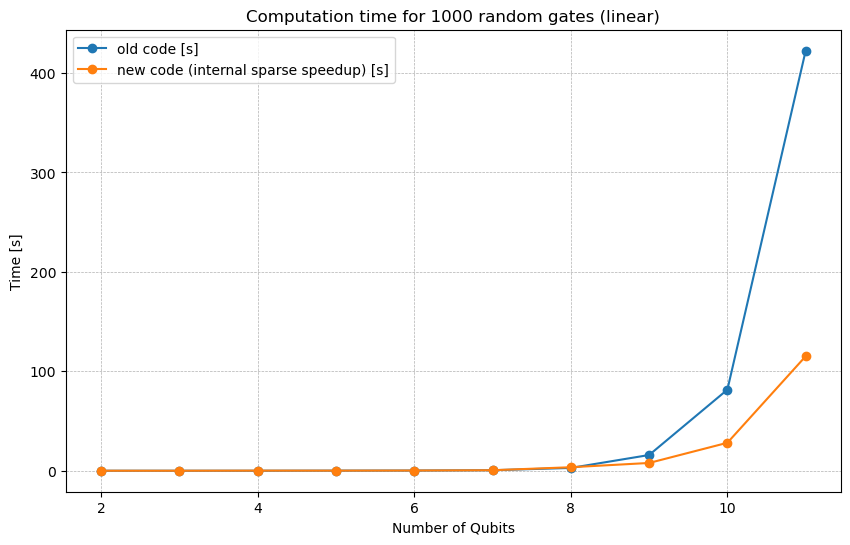

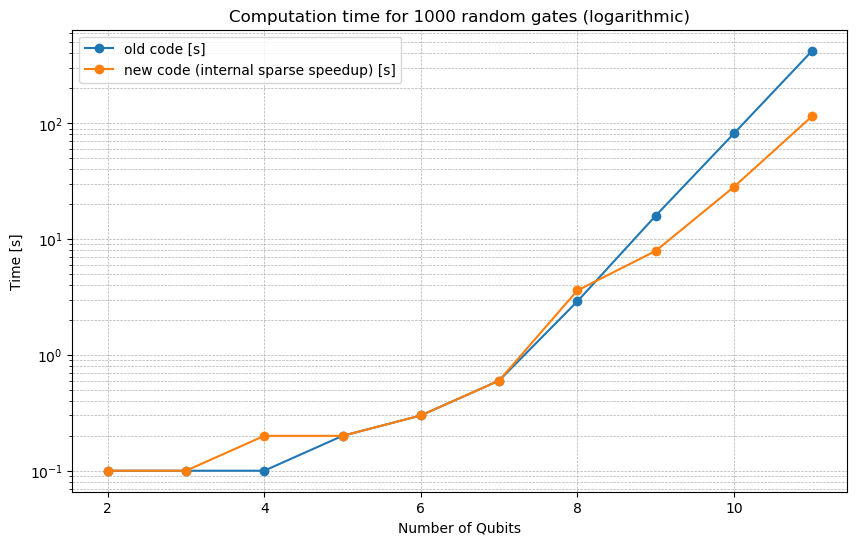

In [13]:

# Data from the table
qubits = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
old_code = [0.1, 0.1, 0.1, 0.2, 0.3, 0.6, 2.9, 15.9, 81.6, 422.4]
sparse_speedup = [0.1, 0.1, 0.2, 0.2, 0.3, 0.6, 3.6, 7.9, 28.2, 115.2]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(qubits, old_code, marker='o', label='old code [s]')
plt.plot(qubits, sparse_speedup, marker='o', label='new code (internal sparse speedup) [s]')

# Customize the plot
plt.title("Computation time for 1000 random gates (linear)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time [s]")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


# another log plot
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(qubits, old_code, marker='o', label='old code [s]')
plt.plot(qubits, sparse_speedup, marker='o', label='new code (internal sparse speedup) [s]')

# Customize the plot
plt.title("Computation time for 1000 random gates (logarithmic)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time [s]")

plt.yscale("log")  # Using logarithmic scale for better visibility of differences

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


# Using scipy.sparse

In [14]:
qubit_amount = random.randint(1, 6)

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
        
# non sparse
Y = go.single_qubit_gate_to_full_gate(go.Y(), qubit_amount, random.randint(1, qubit_amount))
        
# sparse transformation
Y_sparse = csr_matrix(Y)
state_sparse = csr_matrix(state.T)

sol1 = go.gate_operation(state, Y)

sol2 = go.gate_operation(state_sparse, Y_sparse)
        
#convert sparse back 
sol2 = sol2.toarray().T
      
compare = np.allclose(sol1,sol2)

print("Same solution?")
print(compare)
    

Same solution?
True


Calculations are done automatically with sparse matrices when using the instruction syntax and providing the state as a scipy csr_matrix

In [15]:
qubit_amount = 2

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
state_sparse = csr_matrix(state) # transform into csr_matrix 

for gate_number in range(0,1000):
    instr = go.instruction.random_instruction(qubit_amount)
    
    state = go.apply_instruction(state, instr , qubit_amount) # this uses mostly dense matrices
    state_sparse = go.apply_instruction(state_sparse, instr , qubit_amount) # this uses only sparse matrices

compare = np.allclose(state,state_sparse.toarray().T)

print(state)
print(state_sparse.toarray().T)
print("Are they the same?")
print(compare)


[-0.5839425 +0.33242356j  0.21598354-0.00081393j  0.56636564-0.11904124j
  0.12349358-0.38944147j]
[[-0.5839425 +0.33242356j  0.21598354-0.00081393j  0.56636564-0.11904124j
   0.12349358-0.38944147j]]
Are they the same?
True


## Benchmarks

### 1000 random gates

On my system:
| Qubits | All gates [s] | Single Qubit gates [s] | Chunked gates (3) [s] |
|------|-----|-----| -----|
| 1 | 0.1 | 0.1 | 0.1 |
| 2 | 0.5 | 0.4 | 0.5 |
| 3 | 0.8 | 0.6 | 0.6 |
| 4 | 1.0 | 0.8 | 1.1 |
| 5 | 1.3 | 1.1 | 1.5 |
| 6 | 1.7 | 1.4 | 1.8 |
| 7 | 2.1 | 1.6 | 2.1 |
| 8 | 2.7 | 2.3 | 2.8 |
| 9 | 5.4 | 5.5 | 5.5 |
| 10 | 16.7 | 19.0 | 16.9 |
| 11 | 66.4 | 78.2 | 56.5 |
| 12 | 254.0 | 264.6 | 222.5 |

In [16]:
qubit_amount = 5

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
state_sparse = csr_matrix(state)

for gate_number in range(0,1000):
    instr = go.instruction.random_instruction(qubit_amount)

    state_sparse = go.apply_instruction(state_sparse, instr , qubit_amount)

print(state_sparse.toarray().T)

[[ 0.0161905 +0.04782541j  0.06864571-0.1343112j  -0.03594067+0.02880654j
   0.11028929+0.06993133j -0.01326872-0.18147601j -0.05238874+0.16965516j
  -0.15762388-0.11826625j -0.00928342+0.10180476j  0.12546313+0.04860063j
  -0.31859851-0.23581343j -0.11637627-0.02461664j -0.04332407+0.24841869j
  -0.15214305+0.07048114j -0.02159961+0.03376325j -0.04075119-0.06973134j
   0.07499364-0.03094904j  0.03939692+0.15596431j -0.27773115-0.0287033j
  -0.18079486-0.1198812j  -0.02665467-0.07938611j  0.06655305-0.0155069j
   0.13850754+0.03760667j -0.10768893+0.07769508j  0.14530315+0.20914774j
   0.081411  +0.23942331j  0.22621042-0.03522154j  0.13894452-0.13622685j
  -0.141201  -0.07218912j  0.16257404+0.03972926j -0.1263564 -0.23294608j
  -0.00371621+0.0321653j   0.02232243+0.03159435j]]


In [17]:
qubit_amount = 3

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
state_sparse = csr_matrix(state)

for gate_number in range(0,1000):
    instr = go.instruction.random_single_qubit_instruction(qubit_amount)

    state_sparse = go.apply_instruction(state_sparse, instr , qubit_amount)

print(state_sparse.toarray().T)

[[ 0.15301219+0.07392118j  0.35061738-0.45366114j  0.15773855+0.10389422j
   0.45286135-0.44838763j -0.07933589+0.03083659j  0.04654348+0.28339509j
  -0.0919343 +0.02233463j  0.00970031+0.31906523j]]


In [18]:
qubit_amount =  3

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
state_sparse = csr_matrix(state)

for gate_number in range(0,1000):
    instr = go.instruction.chunked_random_instruction(qubit_amount,3)

    state_sparse = go.apply_instruction(state_sparse, instr , qubit_amount)

print(state_sparse.toarray().T)

[[-0.47441242-0.26458524j  0.17123519-0.20929412j -0.22682863+0.14049541j
   0.15508367+0.1352058j   0.38180163+0.16400099j -0.24981777+0.21574513j
  -0.38126477+0.03701158j -0.29687342+0.04230897j]]


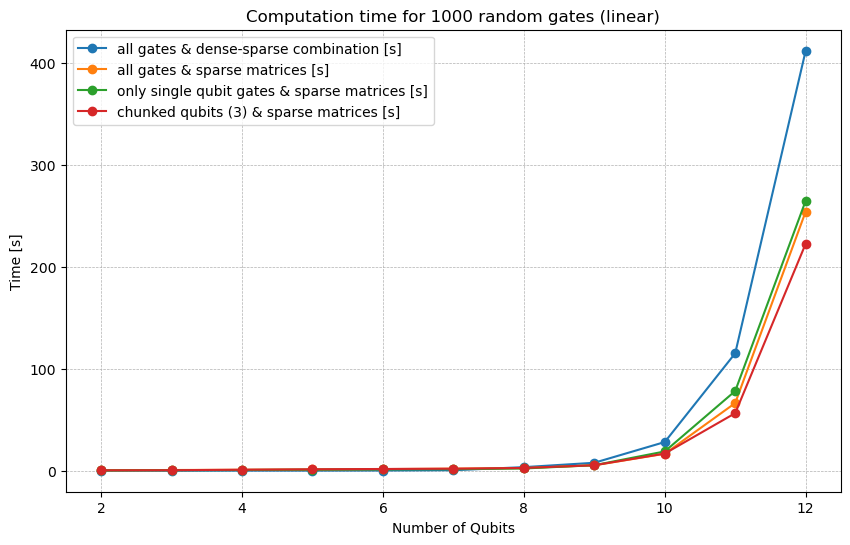

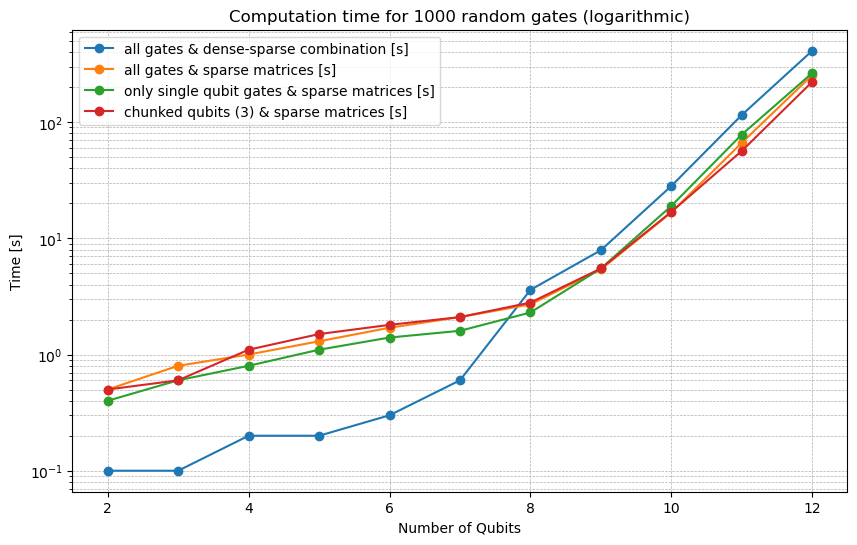

In [19]:
# Data from the table
qubits = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
non_sparse = [0.1, 0.1, 0.2, 0.2, 0.3, 0.6, 3.6, 7.9, 28.2, 115.2,411.6]
all_gates = [0.5, 0.8, 1.0, 1.3, 1.7, 2.1, 2.7, 5.4, 16.7, 66.4, 254.0]
single_qubit_gates = [0.4, 0.6, 0.8, 1.1, 1.4, 1.6, 2.3, 5.5, 19.0, 78.2, 264.6]
chunked_gates = [0.5, 0.6, 1.1, 1.5, 1.8, 2.1, 2.8, 5.5, 16.9, 56.5, 222.5]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(qubits, non_sparse, marker='o', label='all gates & dense-sparse combination [s]')
plt.plot(qubits, all_gates, marker='o', label='all gates & sparse matrices [s]')
plt.plot(qubits, single_qubit_gates, marker='o', label='only single qubit gates & sparse matrices [s]')
plt.plot(qubits, chunked_gates, marker='o', label='chunked qubits (3) & sparse matrices [s]')

# Customize the plot
plt.title("Computation time for 1000 random gates (linear)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time [s]")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


# another log plot
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(qubits, non_sparse, marker='o', label='all gates & dense-sparse combination [s]')
plt.plot(qubits, all_gates, marker='o', label='all gates & sparse matrices [s]')
plt.plot(qubits, single_qubit_gates, marker='o', label='only single qubit gates & sparse matrices [s]')
plt.plot(qubits, chunked_gates, marker='o', label='chunked qubits (3) & sparse matrices [s]')

# Customize the plot
plt.title("Computation time for 1000 random gates (logarithmic)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time [s]")

plt.yscale("log")  # Using logarithmic scale for better visibility of differences

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


# Measurements

### Computational basis measurement

[0.5 0.5 0.5 0.5]
{'00': 261, '01': 265, '10': 233, '11': 241}


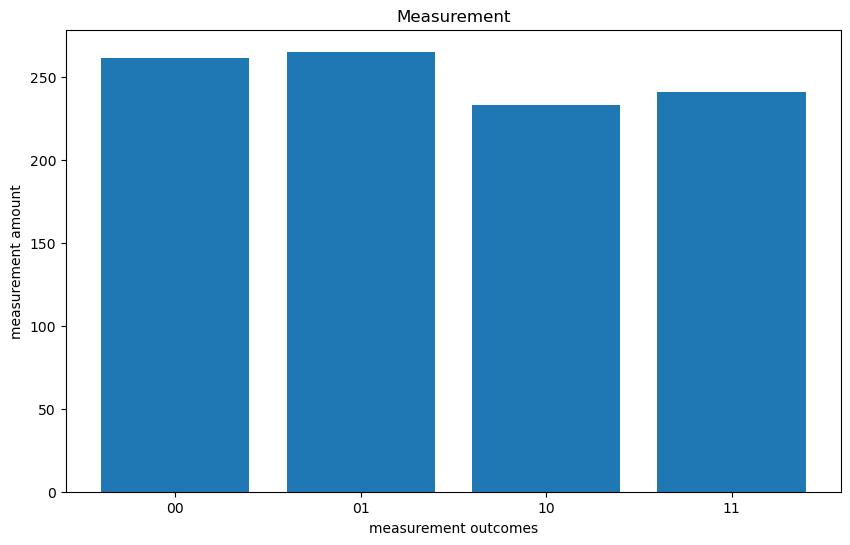

{'00': 0.249, '01': 0.231, '10': 0.283, '11': 0.237}


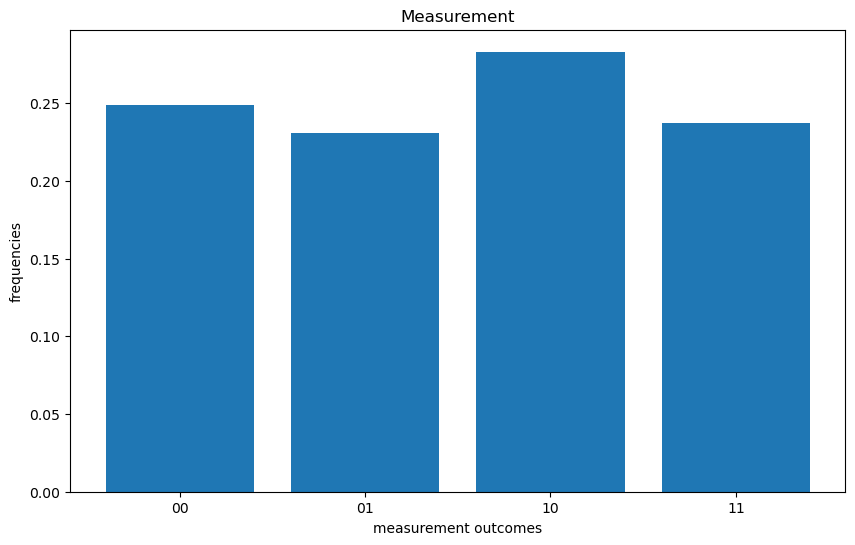

<module 'matplotlib.pyplot' from 'f:\\Programme\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [20]:
# prepare state
state = np.array([1, 0, 0, 0])
instructions = go.create_instruction_list([["H",[1,2]]])
state = reduce(go.apply_instruction, instructions, state)

print(state)

# Measurements
measurements = go.measure_computational(state,2,1000, False)
print(measurements)
go.plot_measurement(measurements,"Measurement","measurement amount")

frequencies = go.measure_computational(state,2,1000)
print(frequencies)
go.plot_measurement(frequencies,"Measurement","frequencies")

### Arbitrary projective measurement

[-0.5-6.123234e-17j  0.5+0.000000e+00j  0.5+0.000000e+00j
 -0.5+6.123234e-17j]


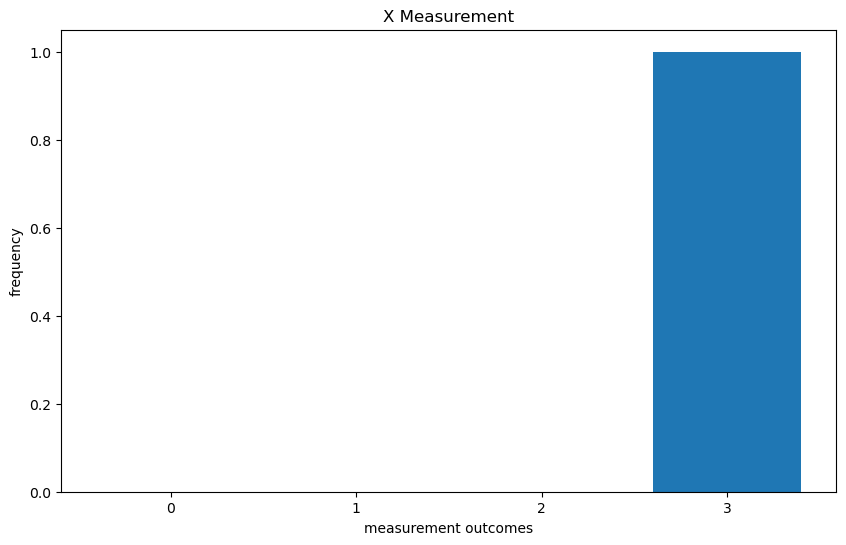

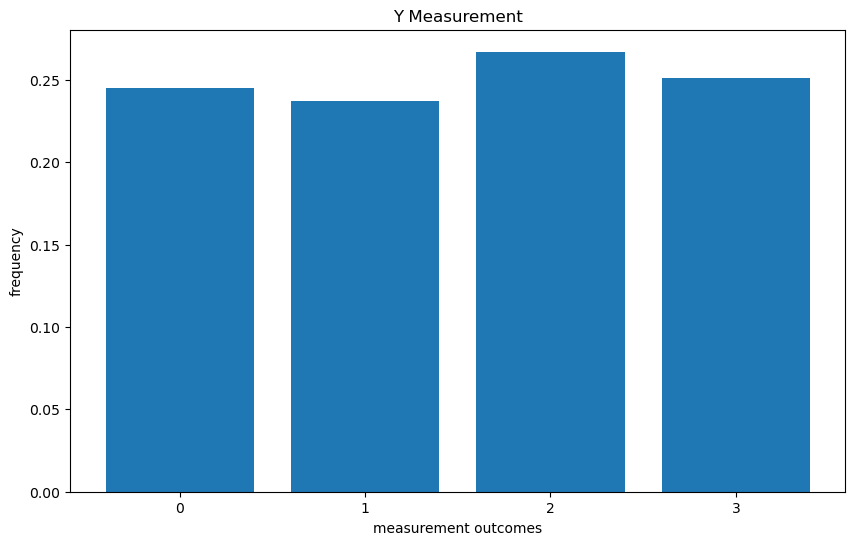

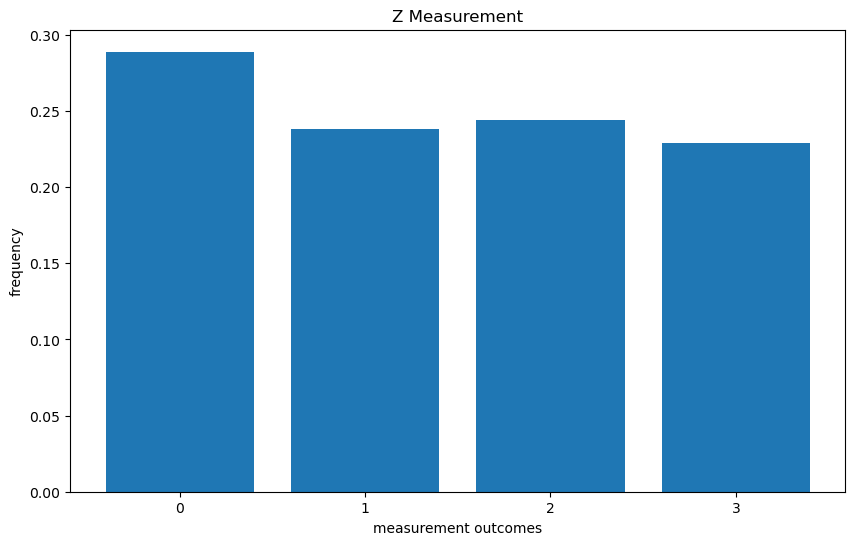

<module 'matplotlib.pyplot' from 'f:\\Programme\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [21]:
# prepare state
state = np.array([1, 0, 0, 0])
instructions = go.create_instruction_list([["H",[1,2]],
                                           ["Rz",[1,2],np.pi]])
state = reduce(go.apply_instruction, instructions, state)
print(state)

# Measurement in X basis
x_frequencies = go.measure_projective(state,1,1000, go.P_x(2))
go.plot_measurement(x_frequencies,"X Measurement","frequency")

# Measurement in Y basis
y_frequencies = go.measure_projective(state,1,1000, go.P_y(2))
go.plot_measurement(y_frequencies,"Y Measurement","frequency")

# measurement in Z basis (default)
z_frequencies = go.measure_projective(state,1,1000, go.P_z(2))
go.plot_measurement(z_frequencies,"Z Measurement","frequency")

### Experimental: Mixed States

### Compare evolution

In [22]:
# Define a pure state (|ψ⟩ = |0⟩)
psi = np.array([[1], [0]])

# Density matrix representation of the pure state
rho = np.outer(psi, psi.conj())  # ρ = |ψ⟩⟨ψ|

# Evolve the state vector |ψ'⟩ = U|ψ⟩
psi_prime = np.dot(go.H(), psi)

# Evolve the density matrix ρ' = UρU†
rho_prime = go.H() @ rho @ go.H().conj().T

# Reconstruct the density matrix from the evolved state vector
rho_prime_from_psi = np.outer(psi_prime, psi_prime.conj())

# Display the results
print("Original state vector (|ψ⟩):")
print(psi)

print("\nOriginal density matrix (ρ):")
print(rho)

print("\nEvolved state vector (|ψ'⟩):")
print(psi_prime)

print("\nEvolved density matrix (ρ') directly:")
print(rho_prime)

print("\nEvolved density matrix (ρ') reconstructed from |ψ'⟩:")
print(rho_prime_from_psi)

# Check if the evolved density matrices match
print("\nDo the evolved density matrices match?")
print(np.allclose(rho_prime, rho_prime_from_psi))

Original state vector (|ψ⟩):
[[1]
 [0]]

Original density matrix (ρ):
[[1 0]
 [0 0]]

Evolved state vector (|ψ'⟩):
[[0.70710678]
 [0.70710678]]

Evolved density matrix (ρ') directly:
[[0.5 0.5]
 [0.5 0.5]]

Evolved density matrix (ρ') reconstructed from |ψ'⟩:
[[0.5 0.5]
 [0.5 0.5]]

Do the evolved density matrices match?
True


### Plotting mixed states

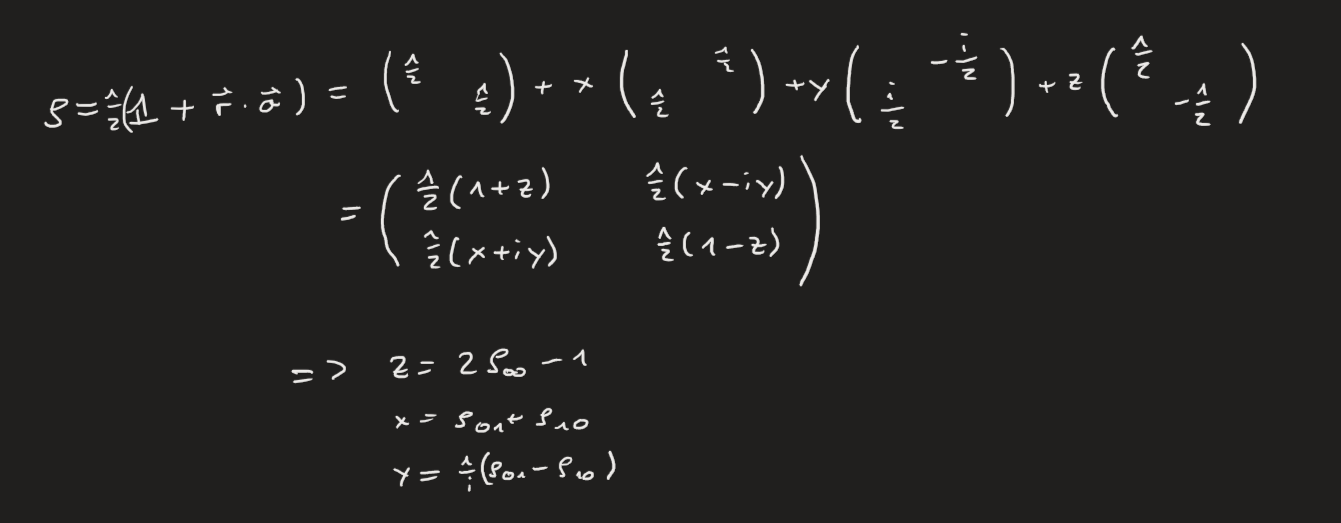

The mixed state is: 
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]


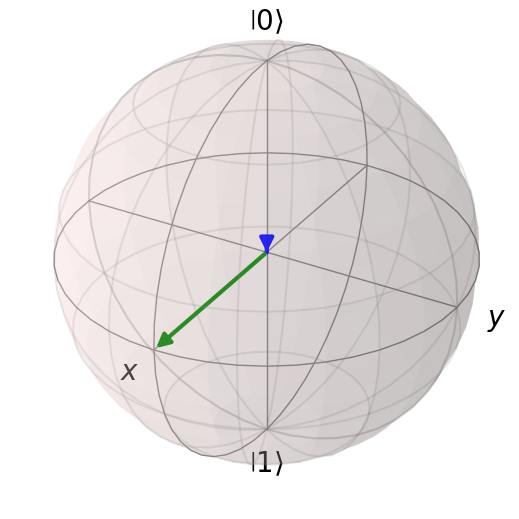

In [38]:
# states
state_1 = np.array([1,0],dtype=complex)
prob_1 = 0.4999999999999
state_2 = np.array([0,1],dtype=complex)
prob_2 = 1 - prob_1
mixed_state = prob_1 * np.outer(state_1, state_1.conj()) + prob_2 * np.outer(state_2, state_2.conj())

pure_state = np.array([1,1],dtype=complex) / np.sqrt(2)


print("The mixed state is: ")
print(mixed_state)

# create plot
bloch_sphere = qt.Bloch()

# SEQUENCE
go.plot_bloch_state(mixed_state, bloch_sphere, "blue")
go.plot_bloch_state(pure_state, bloch_sphere, "green")

bloch_sphere.show()
